In [1]:
# import libraries
import os
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeResult
from azure.ai.documentintelligence.models import AnalyzeDocumentRequest

from dotenv import load_dotenv
load_dotenv()

import urllib.request 
from PIL import Image 

In [2]:
def analyze_credit_card(url):
    endpoint = os.environ.get('ENDPOINT')
    key = os.environ.get('API_KEY')
    document_intelligence_client = DocumentIntelligenceClient(
    endpoint=endpoint, credential=AzureKeyCredential(key))

    poller = document_intelligence_client.begin_analyze_document(
        "prebuilt-creditCard", AnalyzeDocumentRequest(url_source=url))

    card_info = poller.result()

    return card_info

In [3]:
def check_fields(card_info):
    data = {}
    for key, value in card_info.documents[0].fields.items():
        if key == "CardHolderName":
            data[key] = value.content
        elif key == "CardNumber":
            data[key] = value.content
        elif key == "PaymentNetwork":
            data[key] = value.content
        
    if len(data) != 3:
        return "Invalid Card"

    return data

In [4]:
def display_card(url):

    urllib.request.urlretrieve(url, "card.png") 

    # Opening the image and displaying it (to confirm its presence) 
    img = Image.open(r"card.png") 
    display(img)

    card_info = analyze_credit_card(url)
    check_info = check_fields(card_info)
    if check_info == "Invalid Card":
        print(check_info)
    else:

        for key, value in check_info.items():
            print(f"{key}: {value}")


In [9]:
url1 = "https://www.regions.com/-/media/Images/DotCom/Products/business-credit-cards/Business-CC-Spotlight.jpg?revision=89e59129-eafa-4011-a1e4-3ff611246586&la=en&h=480&w=850&hash=BBF4484733C1953A05CC29FC21CA2EF7"

url2 = "https://b2054703.smushcdn.com/2054703/wp-content/uploads/2021/02/Interior-pages-images-Credit-Cards-400x600-1.png?lossy=1&strip=1&webp=1"

url3 = "https://www.hsbc.com.mt/content/dam/hsbc/hbmt/images/credit-cards/16-9/13430-premier-visa-credit-2000x1125.jpg/jcr:content/renditions/cq5dam.web.300.1000.jpeg"


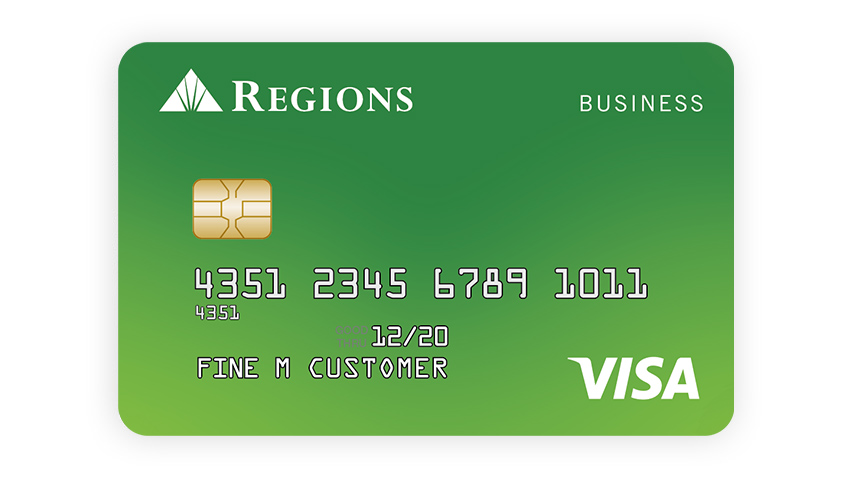

CardHolderName: FINE M CUSTOMER
CardNumber: 4351 2345 6789 1011
PaymentNetwork: VISA


In [6]:
display_card(url1)

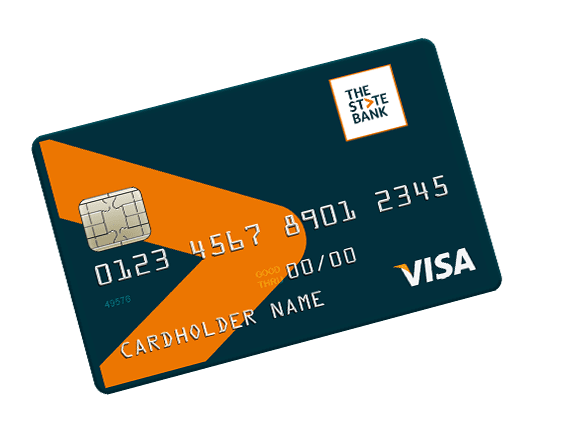

CardHolderName: CARDHOLDER NAME
CardNumber: 0123 4567 8901 2345
PaymentNetwork: VISA


In [7]:
display_card(url2)

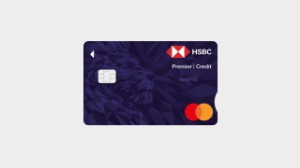

Invalid Card


In [10]:
display_card(url3)